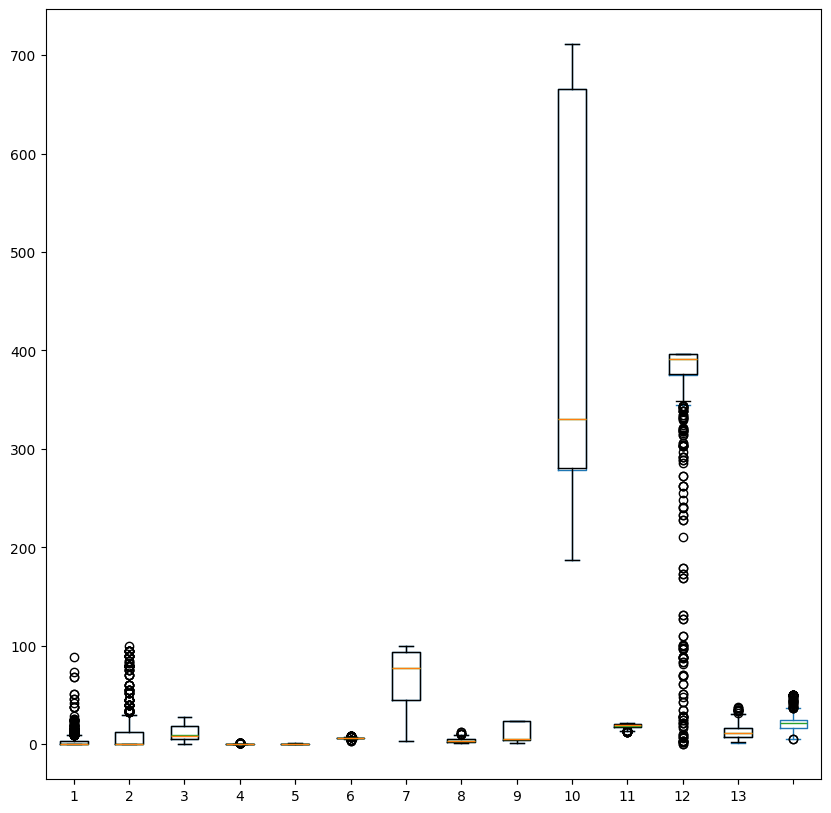

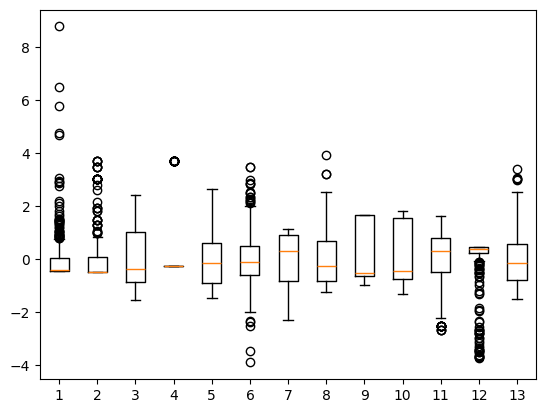

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
import pandas as pd
df_pre = pd.read_csv("data/housing.csv", delim_whitespace=True, header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

df.plot.box(figsize=(10,10))
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=seed)
#Xtrain만 boxpLot으로 시각화 확인
plt.boxplot(X_train)
plt.show()
#정규화 (X- 평균) / 표준편차
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std
#Xtrain만 boxplot으로 정규화 이후 시각화 확인
plt.boxplot(X_train)
plt.show()


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 572.5610 
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 542.2567
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 493.9689
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 410.4026
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 290.9666
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166.8166
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 80.7016
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 44.9754
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 33.3724
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 27.4343
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 23.7209
Epoch 12/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 21.2781
Epoch 13/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 19.5781
Epoch 14/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 18.3196
Epoch 15/200
36/36 ━━━━━━━━━━━━━━━━━

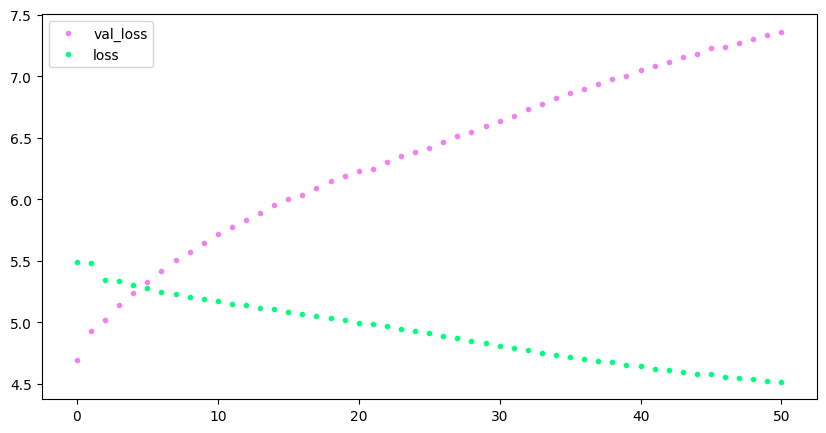

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
실제가격: 19.400, 예상가격: 17.800
실제가격: 10.900, 예상가격: 12.592
실제가격: 34.700, 예상가격: 32.507
실제가격: 15.600, 예상가격: 14.505
실제가격: 22.600, 예상가격: 24.394
실제가격: 29.000, 예상가격: 32.549
실제가격: 23.800, 예상가격: 21.596
실제가격: 45.400, 예상가격: 44.161
실제가격: 50.000, 예상가격: 46.658
실제가격: 26.700, 예상가격: 29.844


In [3]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)
#자동 중단
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)
# 모델 저장 조건 설정
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10, 
                    callbacks=[early_stopping_callback, checkpointer])
hist = pd.DataFrame(history.history)
print(hist.tail())
y_vloss=history.history['val_loss']
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']
import matplotlib.pyplot as plt
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt. figure(figsize=(10, 5))
plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')
plt.legend()
plt.show()
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

2.529309651098753


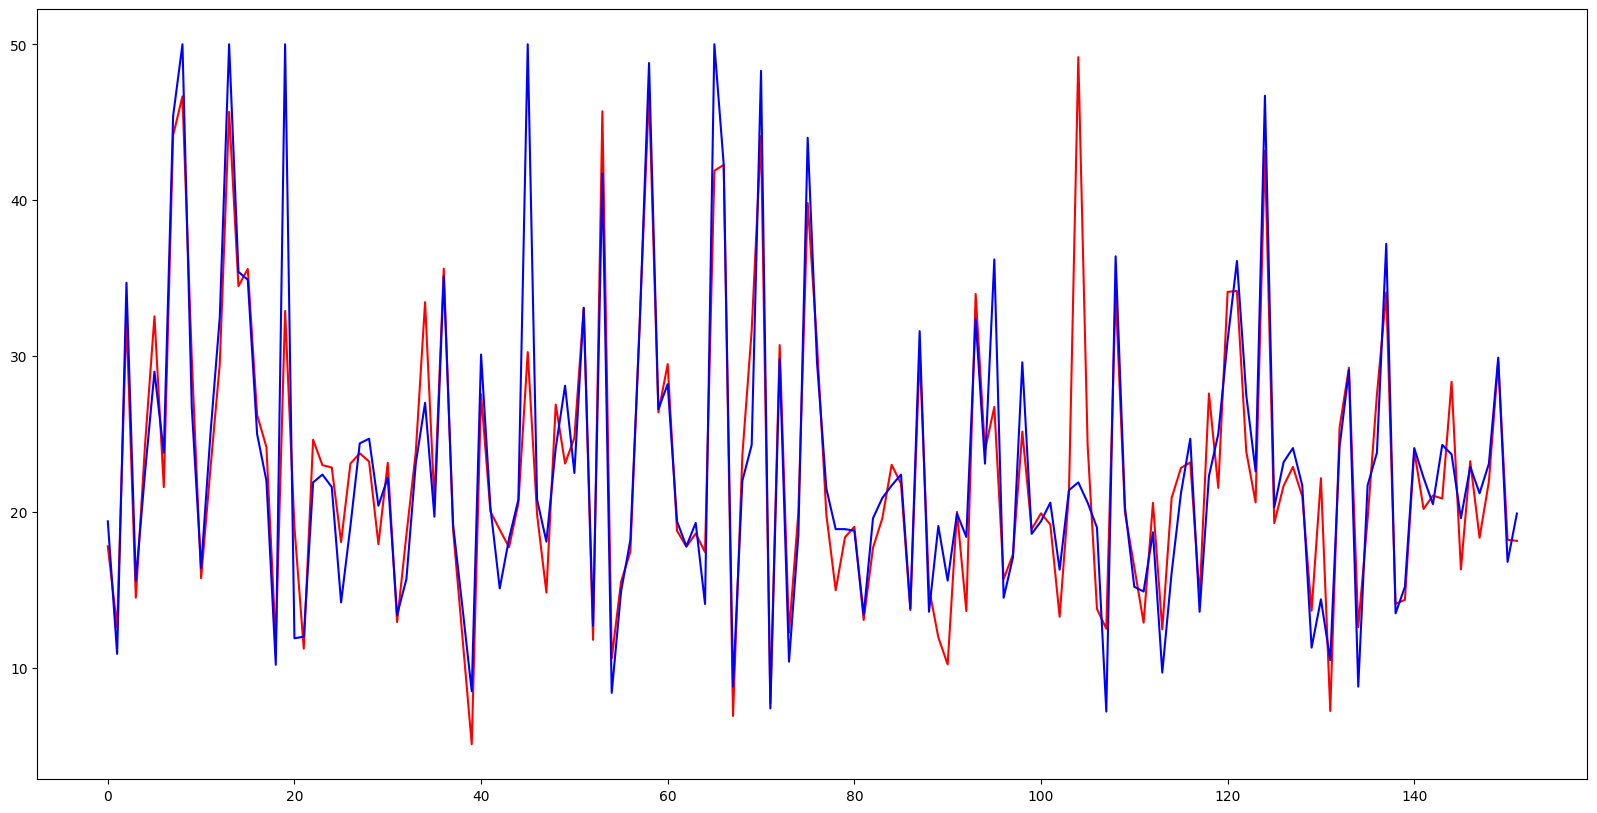

In [4]:
#예측값과 실제값 그래프로 비교
plt.figure(figsize=(20, 10))
plt.plot(Y_prediction, c='red')
plt.plot(Y_test,c='blue')
#예측값과 실제값 오차 평균을 측정
avr = abs(Y_prediction - Y_test).mean()
print(avr)